In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
class hmix():
    def __init__(self):
        self.A_phiStar = 0.0
        self.A_nws13 = 0.0
        self.A_Vm23 = 0.0
        self.aA = 0.0
        self.A_name = ''
        self.B_phiStar = 0.0
        self.B_nws13 = 0.0
        self.B_Vm23 = 0.0
        self.aB = 0.0
        self.B_name = ''
        self.deH_A_partial_infDilute = 0.0
        self.P = 0.0
        self.RP = 0.0
        self.QP = 9.4
        self.e = 1.0
        self.elementName = {}
        self.elementPhiStar = {}
        self.elementNWS13 = {}
        self.elementVM23 = {}
        self.elementRP = {}
        self.elementTRAN = {}
        self.Avogardro = 6.02E23 # unit /mole
        self.xA = np.linspace(0.001,0.999,200)
        self.xAs = np.empty(len(self.xA))
        self.fxs = np.empty(len(self.xA))
        self.g = np.empty(len(self.xA))
        self.deHmix = np.empty(len(self.xA))
        self.xB = 1.0 - self.xA        
        self.__printHead()        
        self.__readDatabase()
        
    def __printHead(self):
        print('-------------------------------------------------')
        print('-Calculate heat of mixing of binary metal system-')
        print('-            based on Miedema scheme            -')
        print('-              Writen by Jun Ou                 -')
        print('-------------------------------------------------')
        return

    def __readDatabase(self):
        try:
            fReadDatabase = open('./database.dat','r')
            for line in fReadDatabase:
                elementTmp = line.replace('\n',' ').replace(' ','').split(',')
                
                #print elementTmp
                nameTmp = elementTmp[0]
                self.elementName[nameTmp] = elementTmp[0]                
                self.elementPhiStar[nameTmp] = elementTmp[1]                
                self.elementNWS13[nameTmp] = elementTmp[2]
                self.elementVM23[nameTmp] = elementTmp[3]
                self.elementRP[nameTmp] = elementTmp[4]
                self.elementTRAN[nameTmp] = elementTmp[5]
            print('succesful initialization of the database.')    
        except ValueError:
            print('database Error')
        return
    
    # get input for the two components    
    def inputElement(self): 
        self.A_name = input('Please input the first component: ')
        self.B_name = input('Please input the second component: ')
        #self.A_name = 'Ti'
        #self.B_name = 'Al'
        return
    
    def calRP(self):
        if self.elementTRAN[self.A_name]=='T' and self.elementTRAN[self.B_name]=='T':
            self.RP = 0.0
        elif self.elementTRAN[self.A_name]=='N' and self.elementTRAN[self.B_name]=='N':
            self.RP = 0.0
        else:
            self.RP = float(self.elementRP[self.A_name])*float(self.elementRP[self.B_name])*0.73
        return
    
    def assiginP(self):
        if self.elementTRAN[self.A_name]=='T' and self.elementTRAN[self.B_name]=='T':
            self.P = 0.147
        elif self.elementTRAN[self.A_name]=='N' and self.elementTRAN[self.B_name]=='N':
            self.P = 0.111
        else:
            self.P = 0.128            
        return    
    
    def decideA(self):
        Alkali = ['Li','Na','K','Rb','Sc','Fr']
        for itm in Alkali:
            if self.elementName[self.A_name] == itm:
                self.aA = 0.14
            if self.elementName[self.B_name] == itm:
                self.aB = 0.14
        return 
        
    def calHmix(self):
        self.A_phiStar = float(self.elementPhiStar[self.A_name])
        self.B_phiStar = float(self.elementPhiStar[self.B_name])
        self.A_nws13 = float(self.elementNWS13[self.A_name])
        self.B_nws13 = float(self.elementNWS13[self.B_name])
        self.A_Vm23 = float(self.elementVM23[self.A_name])
        self.B_Vm23 = float(self.elementVM23[self.B_name])
        dePhi = self.A_phiStar-self.B_phiStar
        deNws13 = self.A_nws13-self.B_nws13
        for i in range(len(self.xA)):
            self.A_Vm23Alloy = self.A_Vm23*(1+self.aA*self.xB[i]*(dePhi))
            self.B_Vm23Alloy = self.B_Vm23*(1+self.aB*self.xA[i]*(-1*dePhi))
            self.xAs[i] = self.xA[i]*self.A_Vm23Alloy/(self.xA[i]*self.A_Vm23Alloy+self.xB[i]*self.B_Vm23Alloy)
            self.fxs[i] = self.xAs[i]*(1.0-self.xAs[i])
            self.g[i] = 2.0*(self.xA[i]*self.A_Vm23Alloy+self.xB[i]*self.B_Vm23Alloy)/(1.0/self.A_nws13+1.0/self.B_nws13)
            self.deHmix[i] = self.Avogardro*self.fxs[i]*self.g[i]*self.P*(-self.e*(dePhi)**2+self.QP*(deNws13)**2-self.RP)*1.60217657E-22
        self.deH_A_partial_infDilute =2.0*self.A_Vm23/(1.0/self.A_nws13+1.0/self.B_nws13)*self.Avogardro*self.P*(-self.e*(dePhi)**2+self.QP*(deNws13)**2-self.RP)*1.60217657E-22
        print('Calculation done.')
        return
    
    def report(self):
        print('')
        print('-------------------------------------------------')
        print('-------------------- report ---------------------')
        print('Two components: ', self.A_name, '(',self.elementTRAN[self.A_name], ') and ', self.B_name, '(',self.elementTRAN[self.B_name],')')
        print('Phi of', self.A_name, self.A_phiStar)
        print('Phi of', self.B_name, self.B_phiStar)
        print('n(ws)^1/3 of', self.A_name, self.A_nws13)
        print('n(ws)^1/3 of', self.B_name, self.B_nws13)
        print('Vm^2/3 of', self.A_name, self.A_Vm23)
        print('Vm^2/3 of', self.B_name, self.B_Vm23)
        print('a_A', self.aA)
        print('a_B', self.aB)
        print('P:', self.P)
        print('R/P:', self.RP)
        print('Q0/P:',self.QP)
        print('deHA at infinite dilution', self.deH_A_partial_infDilute)
        
        print('-------------------------------------------------')
        return
              
    def plot(self):
        fooPlot = input('Plot a figure? y (default)/n: ')
        if fooPlot=='n' or fooPlot=='N':
            print('No is chosen. No figure is produced.')       
        else:
            print('A figure has been produced.')
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.set_xlabel('Mole Fraction of '+str(self.A_name)+' in '+str(self.A_name)+'-'+str(self.B_name))
            ax.set_ylabel(r'$\Delta H_{mix}$ [kJ/mole]')
            ax.set_xlim(0,1)
            ax.plot(self.xA,self.deHmix)
            plt.show()
            plt.close(fig) 
        return

## Run Calculation
Execute the cells below to perform heat of mixing calculations for binary metal systems.

In [3]:
# Initialize calculator
H = hmix()

-------------------------------------------------
-Calculate heat of mixing of binary metal system-
-            based on Miedema scheme            -
-              Writen by Jun Ou                 -
-------------------------------------------------
succesful initialization of the database.


Calculation done.

-------------------------------------------------
-------------------- report ---------------------
Two components:  K ( N ) and  Ag ( T )
Phi of K 2.25
Phi of Ag 4.45
n(ws)^1/3 of K 0.65
n(ws)^1/3 of Ag 1.39
Vm^2/3 of K 12.3
Vm^2/3 of Ag 4.8
a_A 0.14
a_B 0.0
P: 0.128
R/P: 0.0
Q0/P: 9.4
deHA at infinite dilution 41.353312691062825
-------------------------------------------------
A figure has been produced.
A figure has been produced.


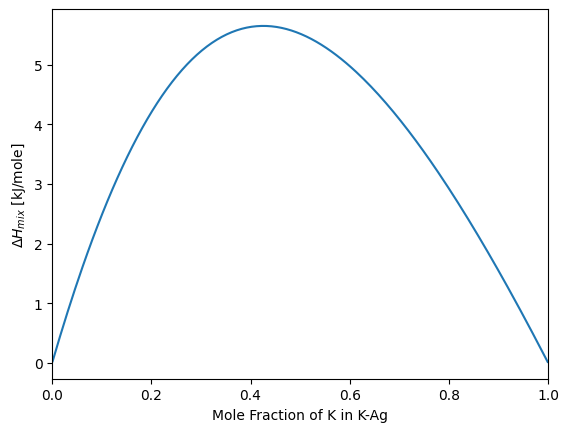

In [5]:
# Input elements and calculate
H.inputElement()
H.calRP()
H.assiginP()
H.decideA()
H.calHmix()
H.report()
H.plot()

### Run again for another system
Execute the cell above multiple times to calculate for different binary systems.